In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"muhammadridwanw","key":"fb747f278d6cb229a1d838445d4f7973"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

401 - Unauthorized


In [ ]:
!unzip stroke-prediction-dataset.zip -d stroke
!ls stroke

Archive:  stroke-prediction-dataset.zip
replace stroke/healthcare-dataset-stroke-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: stroke/healthcare-dataset-stroke-data.csv  
healthcare-dataset-stroke-data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("stroke/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.age[data.age<=20].size

1000

In [ ]:
data.age[(data.age<=40) & (data.age>20)].size

1184

In [ ]:
data.age[(data.age<=60) & (data.age>40)].size

1508

In [ ]:
data.age[data.age>60].size

1217

In [ ]:
data.age[data.age<=20] = 0
data.age[(data.age<=40) & (data.age>20)] = 1
data.age[(data.age<=60) & (data.age>40)] = 2
data.age[data.age>60] = 3

<ipython-input-84-770d9d8bb4f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age[data.age<=20] = 0
<ipython-input-84-770d9d8bb4f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age[(data.age<=40) & (data.age>20)] = 1
<ipython-input-84-770d9d8bb4f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age[(data.age<=60) & (data.age>40)] = 2
<ipython-input-84-770d9d8bb4f9>:4: SettingWithCopyWarning: 
A value is trying t

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,3.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,3.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,2.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,3.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,3.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
data[["age","stroke"]].groupby(["age"],as_index=False).mean().sort_values(by="stroke",ascending=False)

,age,stroke
3,3.0,0.119967
2,2.0,0.037798
1,1.0,0.004223
0,0.0,0.001000


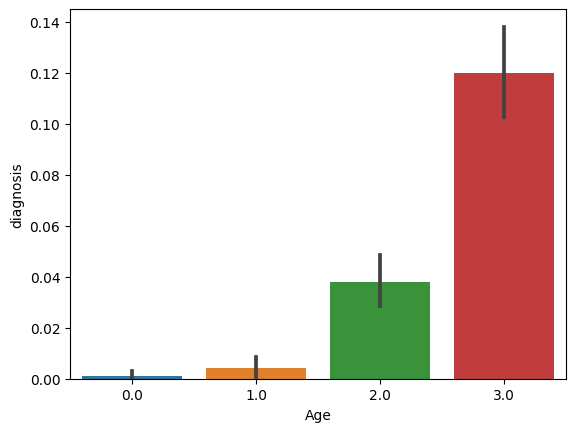

In [ ]:
sns.barplot(data,x="age",y="stroke")
plt.xlabel("Age")
plt.ylabel("diagnosis")
plt.show()

In [ ]:
data.smoking_status=[0 if item == "Unknown" else 1 if item=="never smoked" else 2 if item == "formerly smoked" else 3 for item in data.smoking_status]

In [ ]:
data[["smoking_status","stroke"]].groupby(["smoking_status"],as_index=False).mean().sort_values(by="stroke",ascending=False)

,smoking_status,stroke
2,2,0.068100
3,3,0.052917
1,1,0.045356
0,0,0.019555


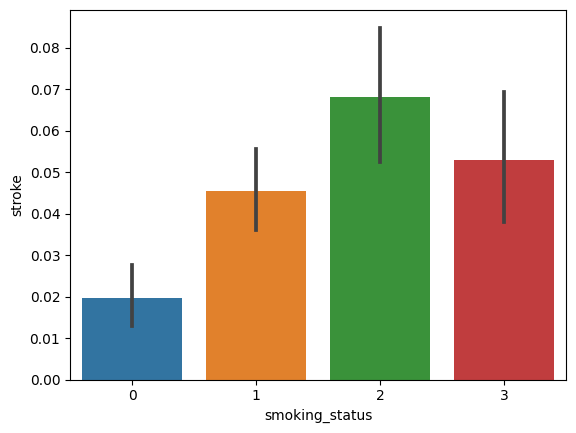

In [ ]:
sns.barplot(data,x="smoking_status",y="stroke")
plt.xlabel("smoking_status")
plt.ylabel("stroke")
plt.show()

In [ ]:
data.Residence_type=[0 if item == "Urban" else 1 for item in data.Residence_type]

In [ ]:
data[["Residence_type","stroke"]].groupby(["Residence_type"],as_index=False).mean().sort_values(by="stroke",ascending=False)

,Residence_type,stroke
0,0,0.043775
1,1,0.041339


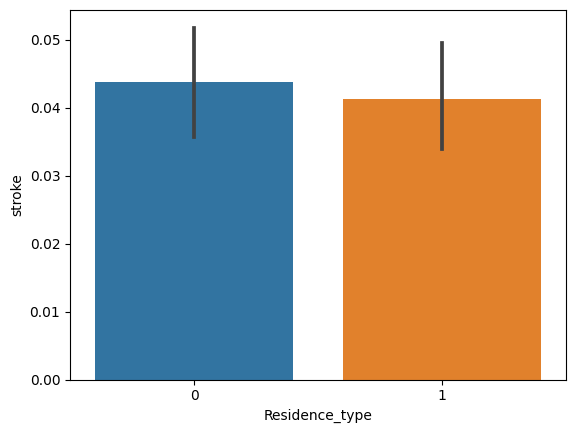

In [ ]:
sns.barplot(data,x="Residence_type",y="stroke")
plt.xlabel("Residence_type")
plt.ylabel("stroke")
plt.show()

In [ ]:
data.work_type=[0 if item == "Never_worked" else 1 if item=="children" else 2 if item == "Govt_job" else 3 if item == "Private" else 4 for item in data.work_type]

In [ ]:
data[["work_type","stroke"]].groupby(["work_type"],as_index=False).mean().sort_values(by="stroke",ascending=False)

,work_type,stroke
4,4,0.068387
3,3,0.045180
2,2,0.044444
1,1,0.001490
0,0,0.000000


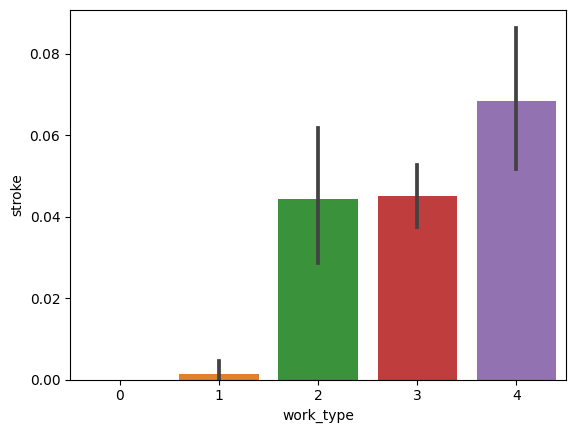

In [ ]:
sns.barplot(data,x="work_type",y="stroke")
plt.xlabel("work_type")
plt.ylabel("stroke")
plt.show()

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,3.0,0,1,Yes,3,0,228.69,36.6,2,1
2,31112,Male,3.0,0,1,Yes,3,1,105.92,32.5,1,1
3,60182,Female,2.0,0,0,Yes,3,0,171.23,34.4,3,1
4,1665,Female,3.0,1,0,Yes,4,1,174.12,24.0,1,1
5,56669,Male,3.0,0,0,Yes,3,0,186.21,29.0,2,1


In [ ]:
data.gender=[0 if item == "Male" else 1 for item in data.gender]

In [ ]:
data[["gender","stroke"]].groupby(["gender"],as_index=False).mean().sort_values(by="stroke",ascending=False)

,gender,stroke
0,0,0.044257
1,1,0.041408


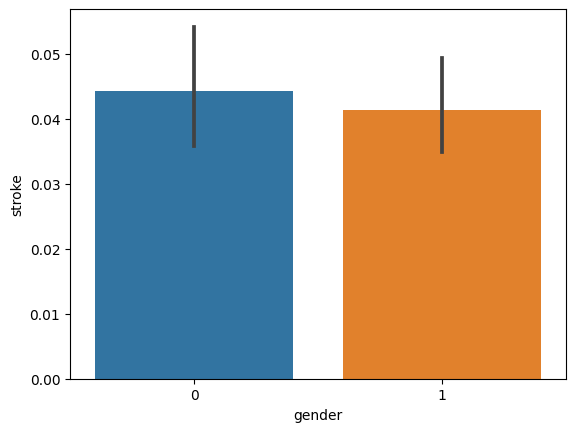

In [ ]:
sns.barplot(data,x="gender",y="stroke")
plt.xlabel("gender")
plt.ylabel("stroke")
plt.show()

In [ ]:
data[["ever_married","stroke"]].groupby(["ever_married"],as_index=False).mean().sort_values(by="stroke",ascending=False)

,ever_married,stroke
1,Yes,0.058052
0,No,0.013490


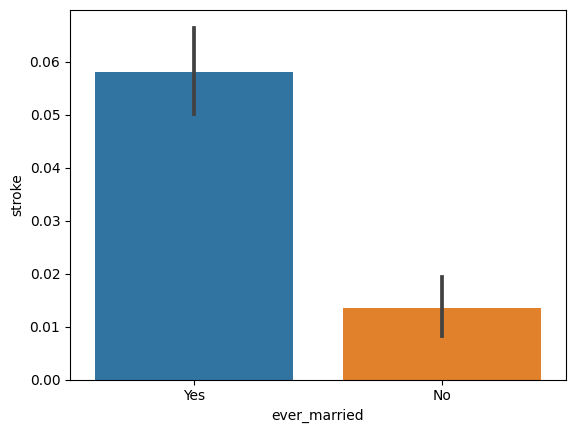

In [ ]:
sns.barplot(data,x="ever_married",y="stroke")
plt.xlabel("ever_married")
plt.ylabel("stroke")
plt.show()

In [ ]:
data.ever_married=[0 if item == "Yes" else 1 for item in data.ever_married]

In [ ]:
data.bmi[data.bmi<=23.5].size

1232

In [ ]:
data.bmi[(data.bmi>23.5) & (data.bmi<=28.1)].size

1251

In [ ]:
data.bmi[(data.bmi>28.1) & (data.bmi<=33.1)].size

1216

In [ ]:
data.bmi[(data.bmi>33.1)].size

1210

In [ ]:
data.bmi=[0 if item <=23.5 else 1 if item>23 and item<=28.1 else 2 if item >28.1 and item<=33.1 else 3 for item in data.bmi]

In [ ]:
data[["bmi","stroke"]].groupby(["bmi"],as_index=False).mean().sort_values(by="stroke",ascending=False)

,bmi,stroke
2,2,0.055921
1,1,0.050360
3,3,0.046281
0,0,0.017857


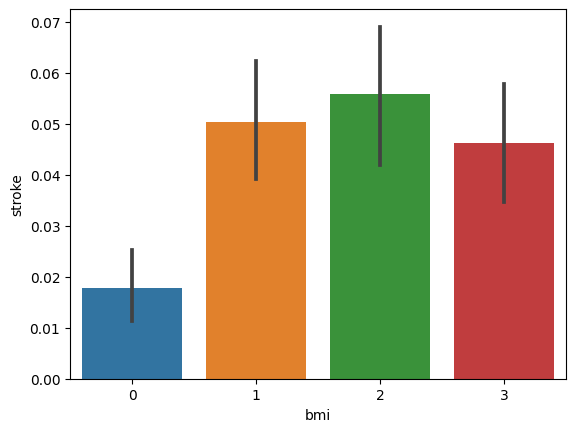

In [ ]:
sns.barplot(data,x="bmi",y="stroke")
plt.xlabel("bmi")
plt.ylabel("stroke")
plt.show()

In [ ]:
data.avg_glucose_level[data.avg_glucose_level<=77.07].size

1228

In [ ]:
data.avg_glucose_level[(data.avg_glucose_level>77.07) & (data.avg_glucose_level<=91.68)].size

1230

In [ ]:
data.avg_glucose_level[(data.avg_glucose_level>91.68) & (data.avg_glucose_level<=113.57)].size

1224

In [ ]:
data.avg_glucose_level[data.avg_glucose_level>113.57].size

1227

In [ ]:
data.avg_glucose_level=[0 if item <=77.07 else 1 if item>77.07 and item<=91.68 else 2 if item >91.68 and item<=113.57 else 3 for item in data.avg_glucose_level]

In [ ]:
data[["avg_glucose_level","stroke"]].groupby(["avg_glucose_level"],as_index=False).mean().sort_values(by="stroke",ascending=False)

,avg_glucose_level,stroke
3,3,0.076610
0,0,0.035016
2,2,0.032680
1,1,0.026016


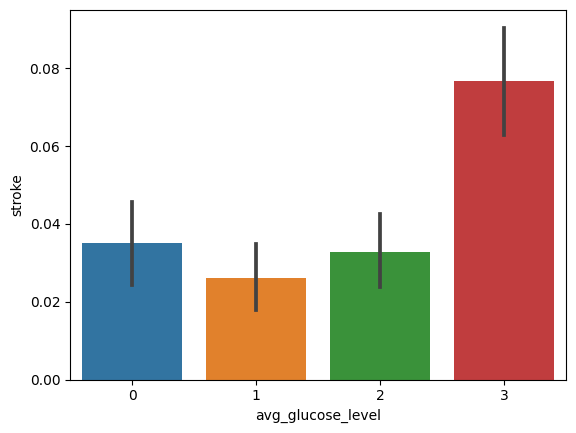

In [ ]:
sns.barplot(data,x="avg_glucose_level",y="stroke")
plt.xlabel("avg_glucose_level")
plt.ylabel("stroke")
plt.show()

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,3.0,0,1,0,3,0,3,3,2,1
2,31112,0,3.0,0,1,0,3,1,2,2,1,1
3,60182,1,2.0,0,0,0,3,0,3,3,3,1
4,1665,1,3.0,1,0,0,4,1,3,1,1,1
5,56669,0,3.0,0,0,0,3,0,3,2,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   int64  
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   int64  
 6   work_type          4909 non-null   int64  
 7   Residence_type     4909 non-null   int64  
 8   avg_glucose_level  4909 non-null   int64  
 9   bmi                4909 non-null   int64  
 10  smoking_status     4909 non-null   int64  
 11  stroke             4909 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 498.6 KB


In [ ]:
data.age=data.age.astype("int64")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 4909 non-null   int64
 1   gender             4909 non-null   int64
 2   age                4909 non-null   int64
 3   hypertension       4909 non-null   int64
 4   heart_disease      4909 non-null   int64
 5   ever_married       4909 non-null   int64
 6   work_type          4909 non-null   int64
 7   Residence_type     4909 non-null   int64
 8   avg_glucose_level  4909 non-null   int64
 9   bmi                4909 non-null   int64
 10  smoking_status     4909 non-null   int64
 11  stroke             4909 non-null   int64
dtypes: int64(12)
memory usage: 498.6 KB


In [ ]:
data.drop("id",axis=1,inplace=True)

In [ ]:
stroke = data[data.stroke==1]
not_stroke = data[data.stroke==0].sample(n = 1000,random_state=42)

In [ ]:
model_data=pd.concat([stroke,not_stroke])

In [ ]:
y=model_data.stroke
x=model_data.drop("stroke",axis=1)

In [ ]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,3,0,1,0,3,0,3,3,2
2,0,3,0,1,0,3,1,2,2,1
3,1,2,0,0,0,3,0,3,3,3
4,1,3,1,0,0,4,1,3,1,1
5,0,3,0,0,0,3,0,3,2,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,confusion_matrix

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4, random_state=42)

In [ ]:
lr= linear_model.LogisticRegression(random_state = 42,max_iter= 100)

In [167]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.9434826883910387

In [ ]:
y=data.stroke
x=data.drop("stroke",axis=1)

In [168]:
rfc.score(x, y)

0.9669993888775718

In [ ]:
test_data = np.array([[0, 3, 1, 1, 0, 2, 0, 3, 3, 3]])
prediction = rfc.predict(test_data)
if prediction[0] == 0:
  result = "tidak memiliki kemungkinan untuk mengidap Stroke "
else:
  result = "memiliki kemungkinan besar untuk mengidap Stroke"
print('Pasien', result)

Pasien memiliki kemungkinan besar untuk mengidap Stroke


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

filename = "stroke.sav"
pickle.dump(rfc,open(filename,'wb'))

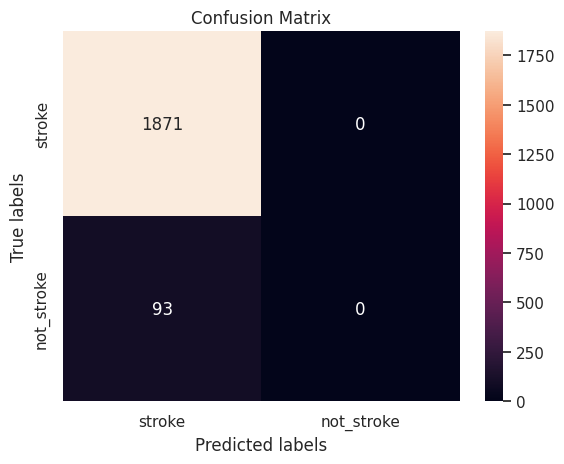

In [169]:
y_pred = lr.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['stroke','not_stroke']); ax.yaxis.set_ticklabels(['stroke','not_stroke']);

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1871
           1       0.12      0.03      0.05        93

    accuracy                           0.94      1964
   macro avg       0.54      0.51      0.51      1964
weighted avg       0.91      0.94      0.93      1964

ROC AUC score: 0.7135710303845336
Accuracy Score:  0.9434826883910387


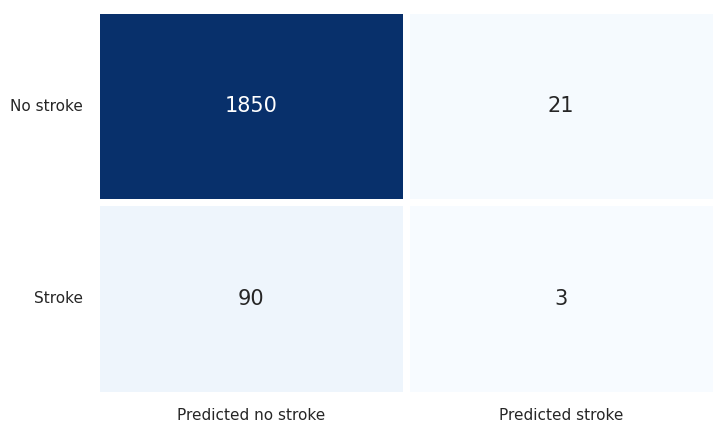

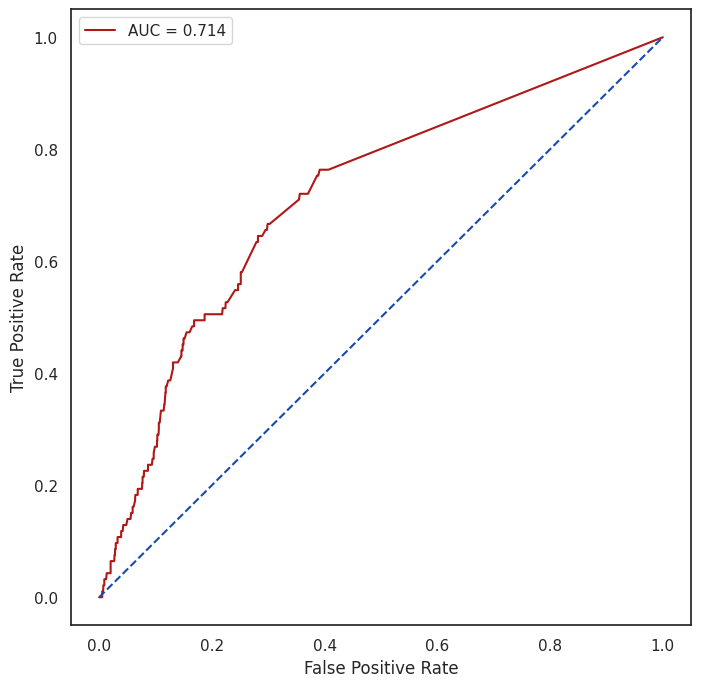

In [170]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, roc_curve, auc

#Fitting RandomForest Model
classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 100, random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))


# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()